<a href="https://colab.research.google.com/github/Kritzr/machine_learning/blob/main/kmeans_kmode_kmedian/kmeans_kmode_kmedian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/iris")

print("Path to dataset files:", path)


100%|██████████| 3.60k/3.60k [00:00<00:00, 1.18MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/uciml/iris/versions/2


In [ ]:
import os

dataset_path = "/root/.cache/kagglehub/datasets/uciml/iris/versions/2"
files = os.listdir(dataset_path)

print(files)


['Iris.csv', 'database.sqlite']


In [ ]:
import pandas as pd
iris_df = pd.read_csv(os.path.join(dataset_path, 'Iris.csv'))
iris_df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
from sklearn.preprocessing import StandardScaler
X= iris_df.drop(columns=['Species'])
y= iris_df['Species']
#we drop the species colum here since we are doing unsupervised learning and species is the target label for us
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#we create an instance of the standard scalar class, which is used to standardise the data-> that is all the values will be from -1 and 1
import pandas as pd
X_scaleddf = pd.DataFrame(X_scaled, columns=X.columns)
X_scaleddf.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-1.720542,-0.900681,1.032057,-1.341272,-1.312977
1,-1.697448,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.674353,-1.385353,0.337848,-1.398138,-1.312977
3,-1.651258,-1.506521,0.106445,-1.284407,-1.312977
4,-1.628164,-1.021849,1.263460,-1.341272,-1.312977


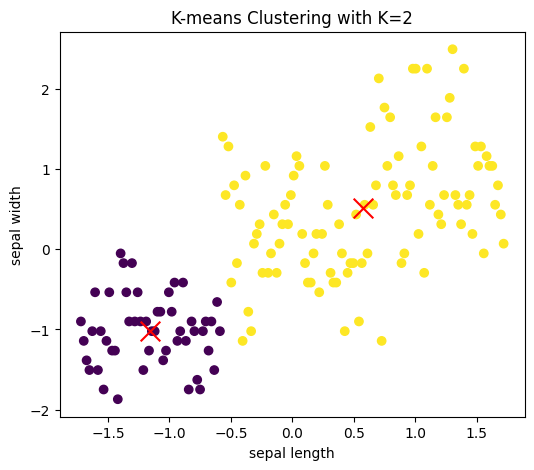

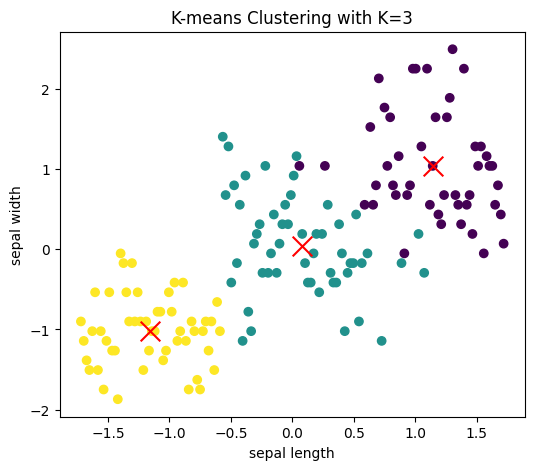

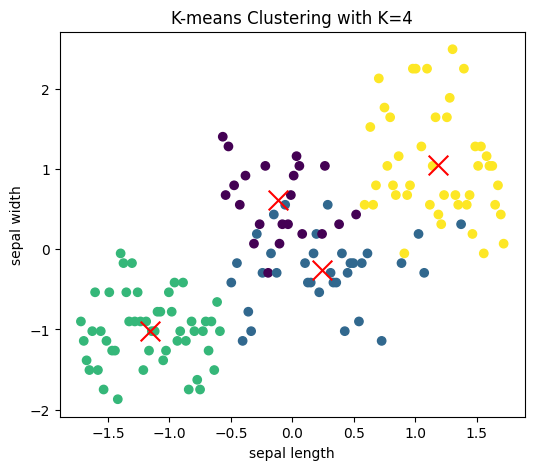

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def apply_kmeans(k, x_scaled):
  kmeans = KMeans(n_clusters=k, random_state =42)
  kmeans.fit(x_scaled)


  plt.figure(figsize =(6,5))
  plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=kmeans.labels_, cmap='viridis')

  centroids = kmeans.cluster_centers_
  plt.scatter(centroids[:,0],centroids[:,1], c='red', s=200, marker='x', label='centroids')
  plt.title(f'K-means Clustering with K={k}')
  plt.xlabel('sepal length')
  plt.ylabel('sepal width')
  plt.show()

  return kmeans.labels_

kmeans_labels_2 = apply_kmeans(2, X_scaled)
kmeans_labels_3 = apply_kmeans(3, X_scaled)
kmeans_labels_4 = apply_kmeans(4, X_scaled)


In [ ]:
!pip install kmodes
from kmodes.kmodes import KModes
import numpy as np

def apply_kmodes(k, x_scaled):
  kmodes = KModes(n_clusters=k, init='Huang', n_init=5, verbose=1)
  clusters= kmodes.fit_predict(x_scaled)
  return clusters

kmodes_labels_2 = apply_kmodes(2, X_scaled)
kmodes_labels_3 = apply_kmodes(3, X_scaled)
kmodes_labels_4 = apply_kmodes(4, X_scaled)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 16, cost: 640.0
Run 1, iteration: 2/100, moves: 3, cost: 640.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 9, cost: 638.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 4, cost: 652.0
Run 3, iteration: 2/100, moves: 1, cost: 652.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 10, cost: 638.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 5, cost: 635.0
Best run was number 5
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 8, cost: 616.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 2, cost:

In [ ]:
kmodes =KModes(n_clusters=2, init='Huang', n_init=5, verbose=1)
clusters = kmodes.fit_predict(X_scaled)
print("Cluster Centers:", kmodes.cluster_centroids_)
print("Cluster Labels:", clusters)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 9, cost: 646.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 8, cost: 642.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 9, cost: 647.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 7, cost: 654.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1, cost: 650.0
Best run was number 2
Cluster Centers: [[-1.72054204 -1.02184904 -0.1249576  -1.3412724  -1.31297673]
 [-1.65125846  1.03800476  0.10644536  0.53529583  0.39617188]]
Cluster Labels: [0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 28.1 MB/s eta 0:00:00


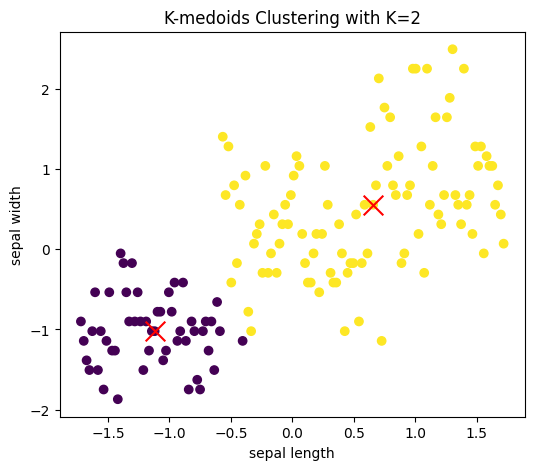

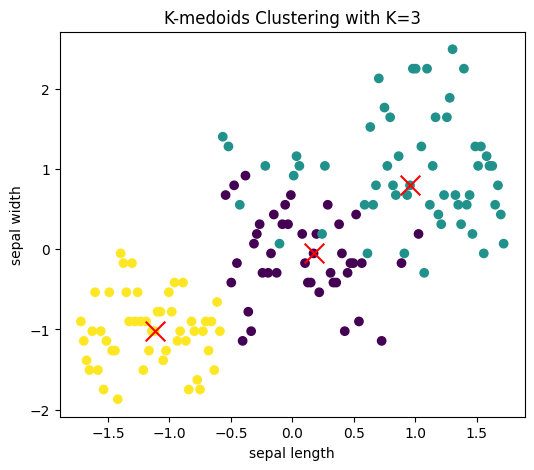

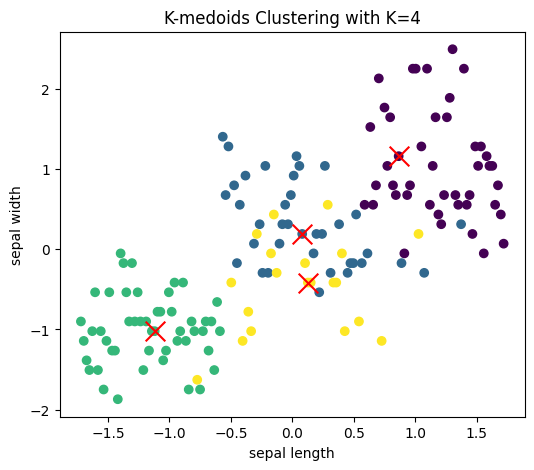

In [ ]:
!pip install KMedoids
!pip install scikit-learn-extra

from sklearn_extra.cluster import KMedoids
def apply_kmedoids(k, x_scaled):
  kmedoids = KMedoids(n_clusters=k, random_state=42)
  kmedoids.fit(x_scaled)
  plt.figure(figsize=(6, 5))
  plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=kmedoids.labels_, cmap='viridis')

  medoids = kmedoids.cluster_centers_
  plt.scatter(medoids[:, 0], medoids[:, 1], c='red', s=200, marker='x', label='medoids')
  plt.title(f'K-medoids Clustering with K={k}')
  plt.xlabel('sepal length')
  plt.ylabel('sepal width')
  plt.show()
  return kmedoids.labels_

kmeans_labels_2 = apply_kmedoids(2, X_scaled)
kmeans_labels_3 = apply_kmedoids(3, X_scaled)
kmeans_labels_4 = apply_kmedoids(4, X_scaled)


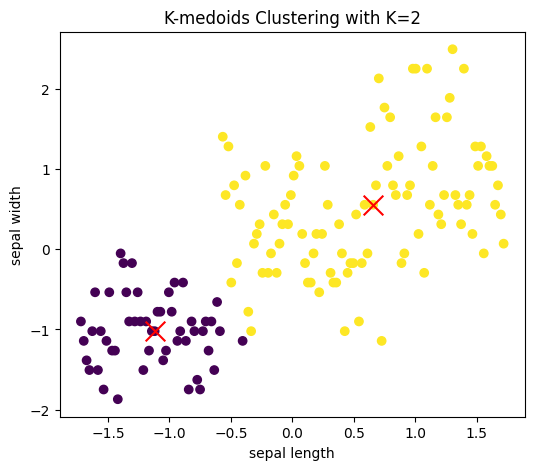

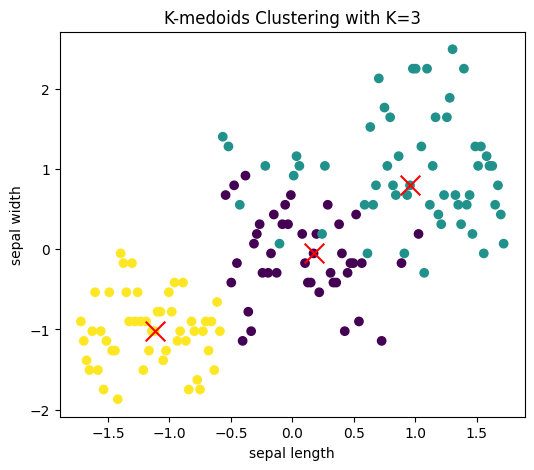

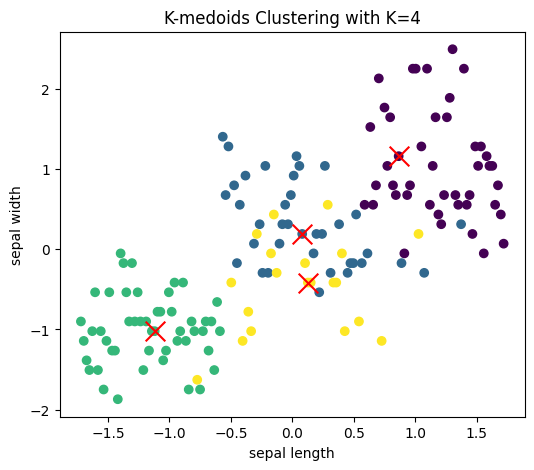

Silhouette Score (K-Means 2 clusters): 0.5662929780250192
Silhouette Score (K-Means 3 clusters): 0.4340943135120247
Silhouette Score (K-Means 4 clusters): 0.4032799722676826
Silhouette Score (K-Median 2 clusters): 0.5662929780250192
Silhouette Score (K-Median 3 clusters): 0.4340943135120247
Silhouette Score (K-Median 4 clusters): 0.4032799722676826
Silhouette Score (K-Mode 2 clusters): -0.028563220366381176
Silhouette Score (K-Mode 3 clusters): -0.0535583972019111
Silhouette Score (K-Mode 4 clusters): -0.08173382536632784


In [ ]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score for each clustering method
silhouette_kmeans_2 = silhouette_score(X_scaled, kmeans_labels_2)
silhouette_kmeans_3 = silhouette_score(X_scaled, kmeans_labels_3)
silhouette_kmeans_4 = silhouette_score(X_scaled, kmeans_labels_4)

# Assign kmedoids results to kmedians variables
kmedians_labels_2 = apply_kmedoids(2, X_scaled)  # Assign to kmedians_labels_2
kmedians_labels_3 = apply_kmedoids(3, X_scaled)  # Assign to kmedians_labels_3
kmedians_labels_4 = apply_kmedoids(4, X_scaled)  # Assign to kmedians_labels_4


silhouette_kmedians_2 = silhouette_score(X_scaled, kmedians_labels_2)
silhouette_kmedians_3 = silhouette_score(X_scaled, kmedians_labels_3)
silhouette_kmedians_4 = silhouette_score(X_scaled, kmedians_labels_4)

silhouette_kmodes_2 = silhouette_score(X_scaled, kmodes_labels_2)
silhouette_kmodes_3 = silhouette_score(X_scaled, kmodes_labels_3)
silhouette_kmodes_4 = silhouette_score(X_scaled, kmodes_labels_4)

print(f"Silhouette Score (K-Means 2 clusters): {silhouette_kmeans_2}")
print(f"Silhouette Score (K-Means 3 clusters): {silhouette_kmeans_3}")
print(f"Silhouette Score (K-Means 4 clusters): {silhouette_kmeans_4}")

print(f"Silhouette Score (K-Median 2 clusters): {silhouette_kmedians_2}")
print(f"Silhouette Score (K-Median 3 clusters): {silhouette_kmedians_3}")
print(f"Silhouette Score (K-Median 4 clusters): {silhouette_kmedians_4}")

print(f"Silhouette Score (K-Mode 2 clusters): {silhouette_kmodes_2}")
print(f"Silhouette Score (K-Mode 3 clusters): {silhouette_kmodes_3}")
print(f"Silhouette Score (K-Mode 4 clusters): {silhouette_kmodes_4}")

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shwetabh123/mall-customers")

print("Path to dataset files:", path)


100%|██████████| 1.56k/1.56k [00:00<00:00, 2.05MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/shwetabh123/mall-customers/versions/1


In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import os

mall_df = pd.read_csv(os.path.join(path, 'Mall_Customers.csv'))
mall_df.head()

x_mall = mall_df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
x_mall_scaled = scaler.fit_transform(x_mall)

x_mall_scaled_df = pd.DataFrame(x_mall_scaled, columns=x_mall.columns)
x_mall_scaled_df.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


Kmeans

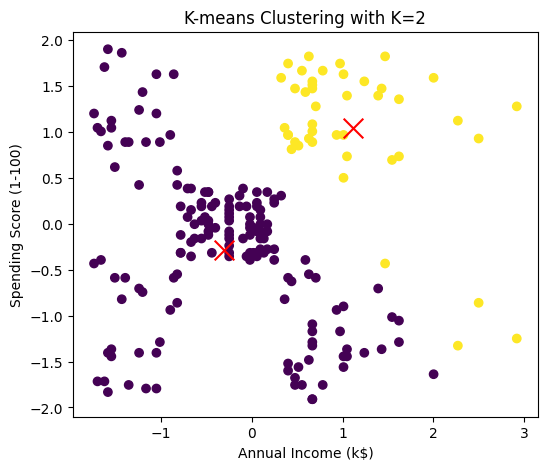

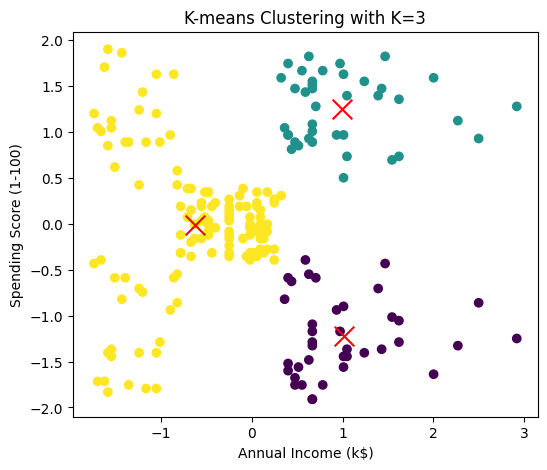

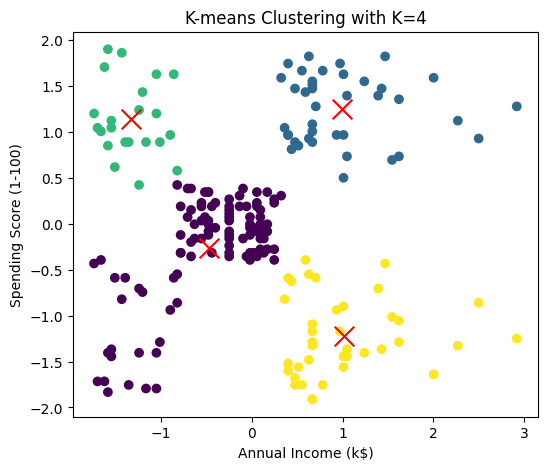

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def apply_kmeans(k, x_scaled):
  kmeans = KMeans(n_clusters=k, random_state =42)
  kmeans.fit(x_scaled)

  # Get cluster labels after fitting the model
  labels = kmeans.labels_

  plt.figure(figsize =(6,5))
  plt.scatter(x_scaled[:,0],x_scaled[:,1], c=labels, cmap='viridis') # Now 'labels' is defined
  centroids = kmeans.cluster_centers_
  plt.scatter(centroids[:,0],centroids[:,1], c='red', s=200, marker='x', label='centroids')
  plt.title(f'K-means Clustering with K={k}')
  plt.xlabel('Annual Income (k$)')
  plt.ylabel('Spending Score (1-100)')
  plt.show()

  return kmeans.labels_

kmeans_labels_2 = apply_kmeans(2, x_mall_scaled)
kmeans_labels_3 = apply_kmeans(3, x_mall_scaled)
kmeans_labels_4 = apply_kmeans(4, x_mall_scaled)

kmedian


In [10]:
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score, davies_bouldin_score

def apply_kmedoids(k, x_scaled, metric):
  kmedoids = KMedoids(n_clusters=k, metric = metric, random_state=42)
  labels = kmedoids.fit_predict(x_scaled)

  silhouette = silhouette_score(x_scaled, labels)
  davies_bouldin = davies_bouldin_score(x_scaled, labels)
  print(f"Silhouette Score: {silhouette}")
  print(f"Davies-Bouldin Score: {davies_bouldin}")
  return labels

kmedoids_labels_2 = apply_kmedoids(2, x_mall_scaled, 'euclidean')



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 16.4 MB/s eta 0:00:00
Silhouette Score: 0.28757820654914745
Davies-Bouldin Score: 1.3012754342454635


In [15]:
!pip install kmodes
from kmodes.kmodes import KModes

# Convert numerical data into categorical bins
mall_df['Income_Category'] = pd.cut(mall_df['Annual Income (k$)'], bins=[0, 40, 70, 150], labels=['Low', 'Medium', 'High'])
mall_df['Spending_Category'] = pd.cut(mall_df['Spending Score (1-100)'], bins=[0, 40, 70, 100], labels=['Low', 'Medium', 'High'])

# Selecting categorical columns for K-Modes
mall_categorical = mall_df[['Genre', 'Income_Category', 'Spending_Category']]

# Convert categorical data to string format
mall_categorical = mall_categorical.astype(str)

# Apply K-Modes clustering
kmodes = KModes(n_clusters=3, init='Huang', n_init=5, verbose=1)
clusters = kmodes.fit_predict(mall_categorical)

# Add cluster labels to dataset
mall_df['Cluster_KModes'] = clusters

# Print cluster centers
print("Cluster Centers:", kmodes.cluster_centroids_)

# Display first few rows with cluster labels
mall_df[['Genre', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster_KModes']].head()


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 46, cost: 156.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 161.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 28, cost: 160.0
Run 3, iteration: 2/100, moves: 7, cost: 160.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 27, cost: 132.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 19, cost: 161.0
Best run was number 4
Cluster Centers: [['Female' 'Medium' 'Medium']
 ['Female' 'Low' 'High']
 ['Male' 'High' 'Low']]


,Genre,Annual Income (k$),Spending Score (1-100),Cluster_KModes
0,Male,15,39,2
1,Male,15,81,1
2,Female,16,6,1
3,Female,16,77,1
4,Female,17,40,1


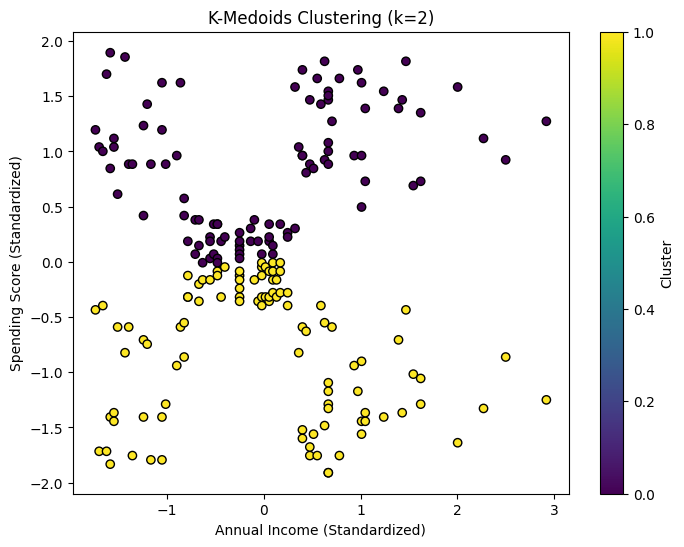

In [18]:
import matplotlib.pyplot as plt

def plot_clusters(x_scaled, labels, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k')
    plt.xlabel("Annual Income (Standardized)")
    plt.ylabel("Spending Score (Standardized)")
    plt.title(title)
    plt.colorbar(label="Cluster")
    plt.show()

plot_clusters(x_mall_scaled, kmedoids_labels_2, "K-Medoids Clustering (k=2)")


In [19]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/mushroom-classification")

print("Path to dataset files:", path)

100%|██████████| 34.2k/34.2k [00:00<00:00, 29.8MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/uciml/mushroom-classification/versions/1


Path to dataset files: /root/.cache/kagglehub/datasets/uciml/mushroom-classification/versions/1
  class cap-shape cap-surface cap-color  ... ring-type spore-print-color population habitat
0     p         x           s         n  ...         p                 k          s       u
1     e         x           s         y  ...         p                 n          n       g
2     e         b           s         w  ...         p                 n          n       m
3     p         x           y         w  ...         p                 k          s       u
4     e         x           s         g  ...         e                 n          a       g

[5 rows x 23 columns]
K-Means (k=2) - Silhouette Score: 0.1794098257892969, Davies-Bouldin Score: 1.4529975304154288
K-Medoids (k=2) - Silhouette Score: 0.15333663912512382, Davies-Bouldin Score: 2.321225900226649


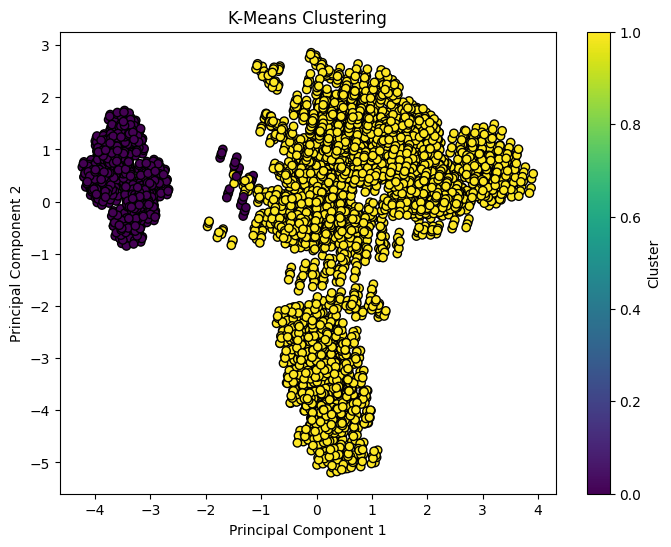

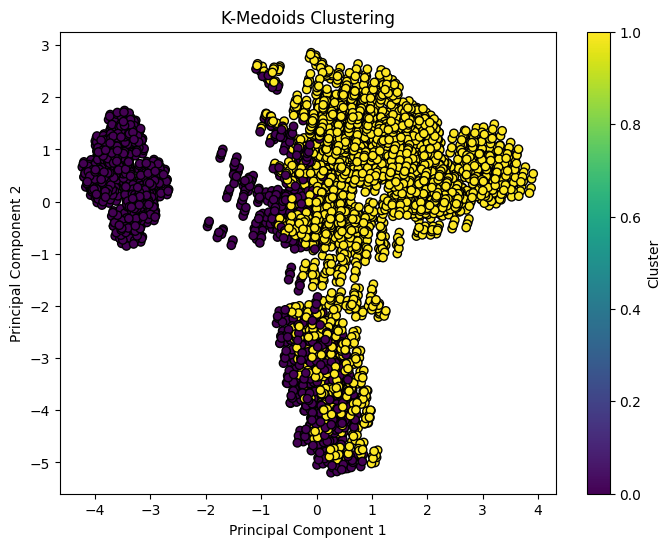

In [21]:
import kagglehub
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from kmodes.kmodes import KModes
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Download the dataset
path = kagglehub.dataset_download("uciml/mushroom-classification")
print("Path to dataset files:", path)

# Load the dataset into a pandas DataFrame
mushroom_df = pd.read_csv(os.path.join(path, 'mushrooms.csv'))
print(mushroom_df.head())

# Encode categorical features
label_encoders = {}
encoded_mushroom_df = mushroom_df.copy()

# Apply LabelEncoder to each column
for col in mushroom_df.columns:
    le = LabelEncoder()
    encoded_mushroom_df[col] = le.fit_transform(mushroom_df[col])
    label_encoders[col] = le  # Store encoder for inverse transformations if needed

# Normalize numerical data (if applicable)
scaler = StandardScaler()
mushroom_scaled = scaler.fit_transform(encoded_mushroom_df)

# K-Means Clustering
def apply_kmeans(k, x_scaled):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(x_scaled)
    silhouette = silhouette_score(x_scaled, labels)
    davies_bouldin = davies_bouldin_score(x_scaled, labels)
    print(f"K-Means (k={k}) - Silhouette Score: {silhouette}, Davies-Bouldin Score: {davies_bouldin}")
    return labels

kmeans_labels = apply_kmeans(2, mushroom_scaled)

# K-Medoids Clustering
def apply_kmedoids(k, x_scaled, metric):
    kmedoids = KMedoids(n_clusters=k, metric=metric, random_state=42)
    labels = kmedoids.fit_predict(x_scaled)
    silhouette = silhouette_score(x_scaled, labels)
    davies_bouldin = davies_bouldin_score(x_scaled, labels)
    print(f"K-Medoids (k={k}) - Silhouette Score: {silhouette}, Davies-Bouldin Score: {davies_bouldin}")
    return labels

kmedoids_labels = apply_kmedoids(2, mushroom_scaled, 'euclidean')

# K-Modes Clustering (for categorical data)
def apply_kmodes(k, x_categorical):
    kmodes = KModes(n_clusters=k, init='Huang', n_init=5, random_state=42)
    labels = kmodes.fit_predict(x_categorical)
    return labels

kmodes_labels = apply_kmodes(2, encoded_mushroom_df)

# Plot function with PCA for dimensionality reduction (since mushroom data has many features)
def plot_clusters(x_scaled, labels, title):
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(x_scaled)
    plt.figure(figsize=(8, 6))
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k')
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title(title)
    plt.colorbar(label="Cluster")
    plt.show()

# Visualizing Clusters
plot_clusters(mushroom_scaled, kmeans_labels, "K-Means Clustering")
plot_clusters(mushroom_scaled, kmedoids_labels, "K-Medoids Clustering")
